# EDA

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


df = pd.read_csv('car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [80]:
missing_percentages = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages

transmission    0.116943
body            0.023612
condition       0.021151
trim            0.019059
model           0.018608
make            0.018433
color           0.001340
interior        0.001340
odometer        0.000168
mmr             0.000068
sellingprice    0.000021
saledate        0.000021
vin             0.000007
year            0.000000
state           0.000000
seller          0.000000
dtype: float64

In [90]:
df = df.dropna()
df = df.drop(columns='vin')
df = df.drop(columns='condition')
df = df.rename(columns={"year":"release_year",
                        "make":"manufacturer",
                        "body":"body_type",
                        "odometer":"mileage",
                        "color":"exterior_color",
                        "interior":"interior_color",
                        "mmr":"MMR_value",
                        "sellingprice":"price",
                        "saledate":"sale_date"})
missing_percentages = df.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages

release_year      0.0
manufacturer      0.0
model             0.0
trim              0.0
body_type         0.0
transmission      0.0
state             0.0
mileage           0.0
exterior_color    0.0
interior_color    0.0
seller            0.0
MMR_value         0.0
price             0.0
sale_date         0.0
dtype: float64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   release_year    472325 non-null  int64  
 1   manufacturer    472325 non-null  object 
 2   model           472325 non-null  object 
 3   trim            472325 non-null  object 
 4   body_type       472325 non-null  object 
 5   transmission    472325 non-null  object 
 6   state           472325 non-null  object 
 7   mileage         472325 non-null  float64
 8   exterior_color  472325 non-null  object 
 9   interior_color  472325 non-null  object 
 10  seller          472325 non-null  object 
 11  MMR_value       472325 non-null  float64
 12  price           472325 non-null  float64
 13  sale_date       472325 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 70.2+ MB


In [93]:
df.describe()

,release_year,mileage,MMR_value,price
count,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,66701.732040,13837.058964,13690.512058
std,3.822151,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,25.000000,1.000000
25%,2008.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,999999.000000,182000.000000,230000.000000


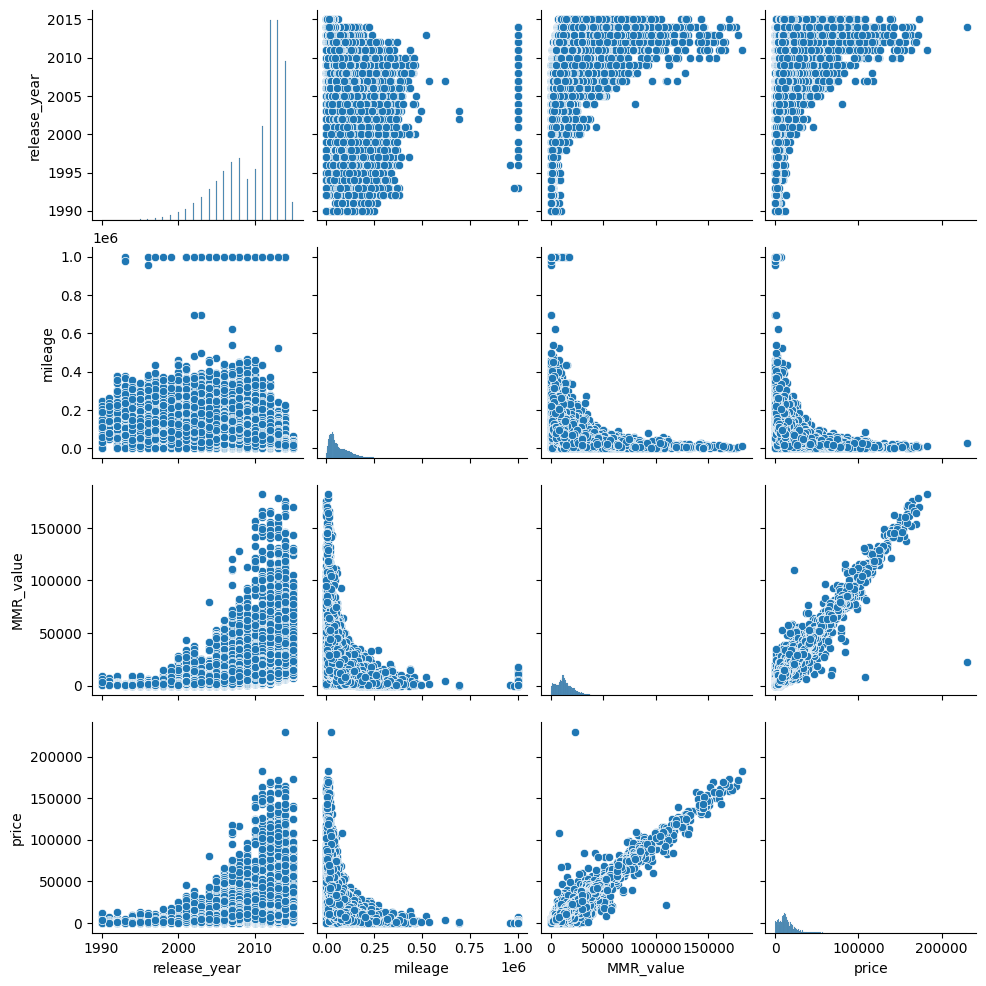

In [95]:
sns.pairplot(df)

<Axes: xlabel='transmission'>

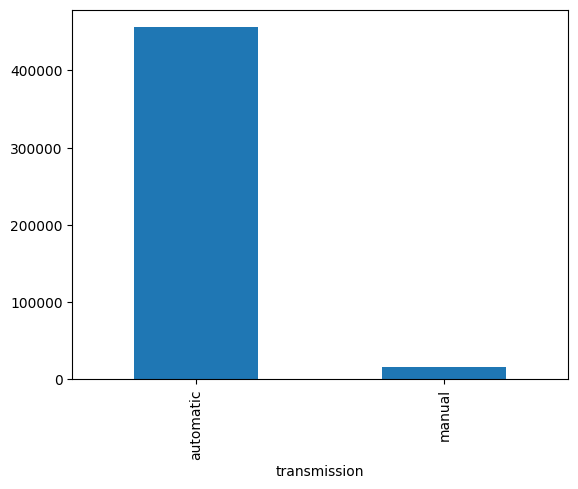

In [99]:
df['transmission'].value_counts().plot(kind='bar')


<Axes: xlabel='body_type'>

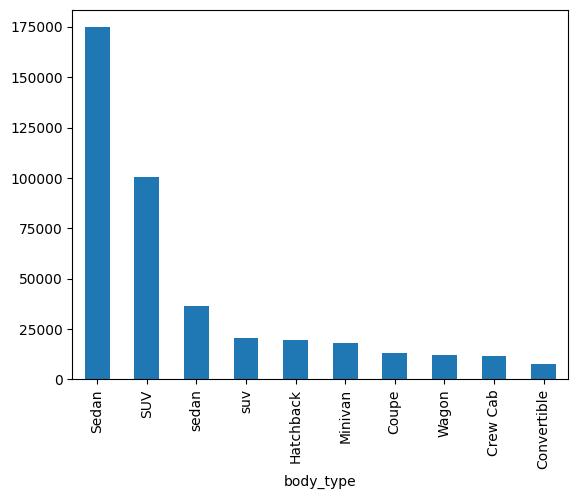

In [101]:
df['body_type'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='release_year'>

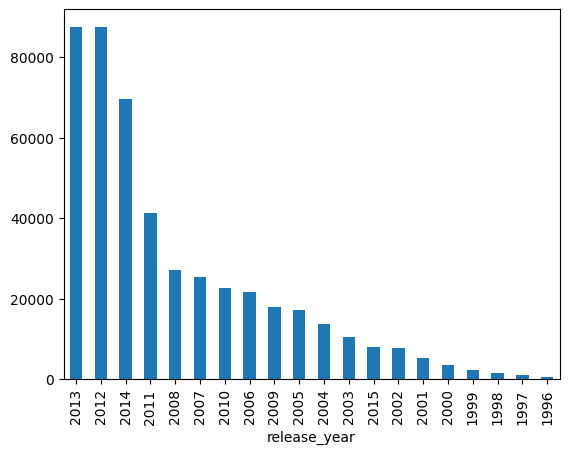

In [105]:
df['release_year'].value_counts().head(20).plot(kind='bar')

<Axes: xlabel='exterior_color'>

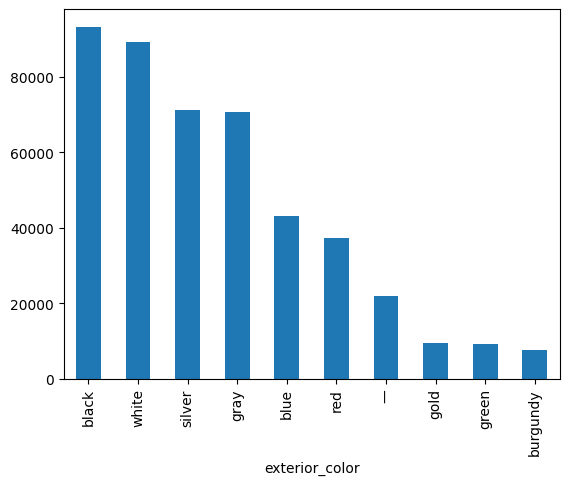

In [106]:
df['exterior_color'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='interior_color'>

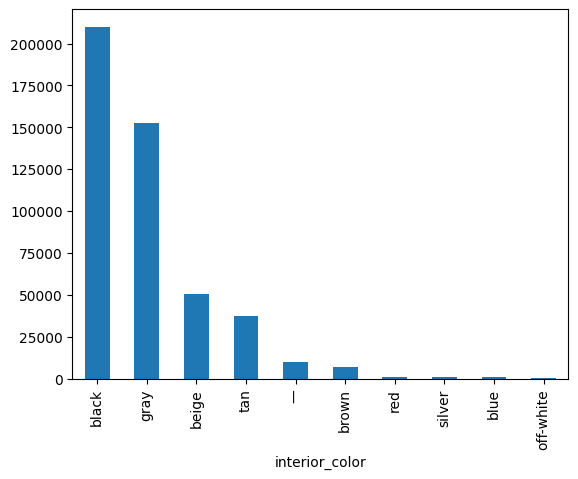

In [107]:
df['interior_color'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='manufacturer'>

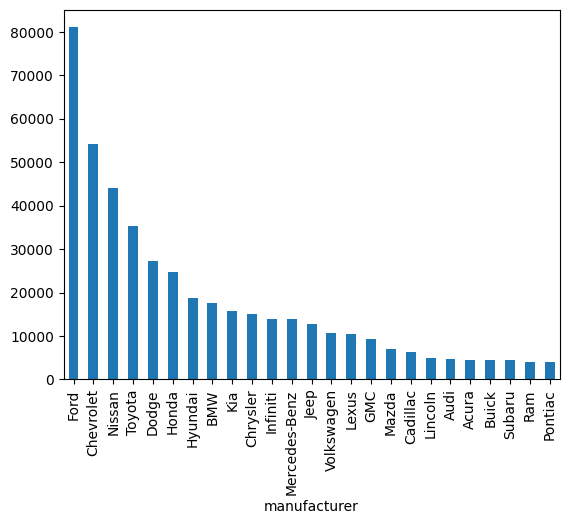

In [109]:
df['manufacturer'].value_counts().head(25).plot(kind='bar')

<Axes: xlabel='MMR_value', ylabel='Count'>

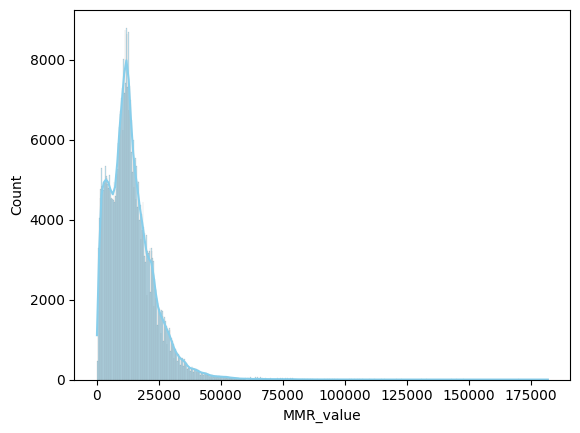

In [113]:
sns.histplot(df['MMR_value'], kde=True, color='skyblue')


<Axes: xlabel='mileage', ylabel='Count'>

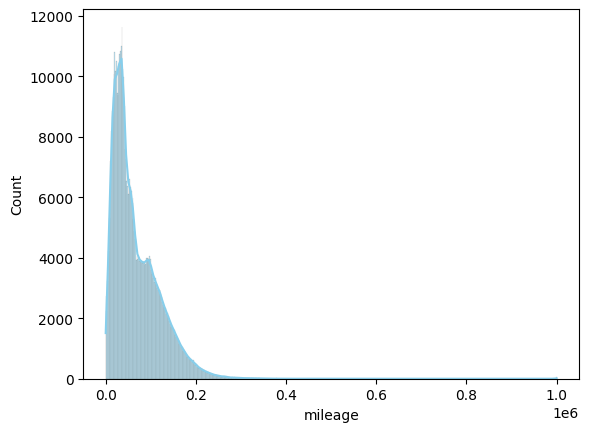

In [114]:
sns.histplot(df['mileage'], kde=True, color='skyblue')


<Axes: xlabel='price', ylabel='Count'>

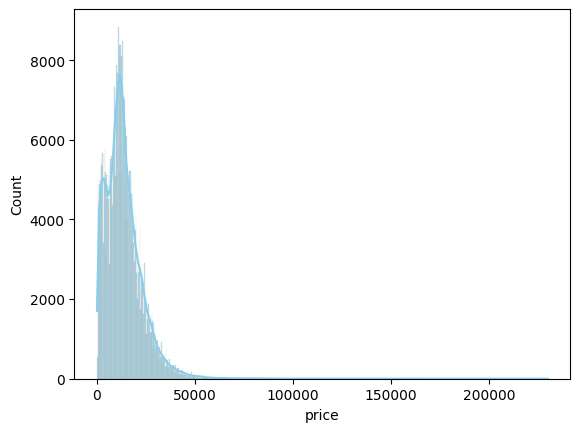

In [115]:
sns.histplot(df['price'], kde=True, color='skyblue')


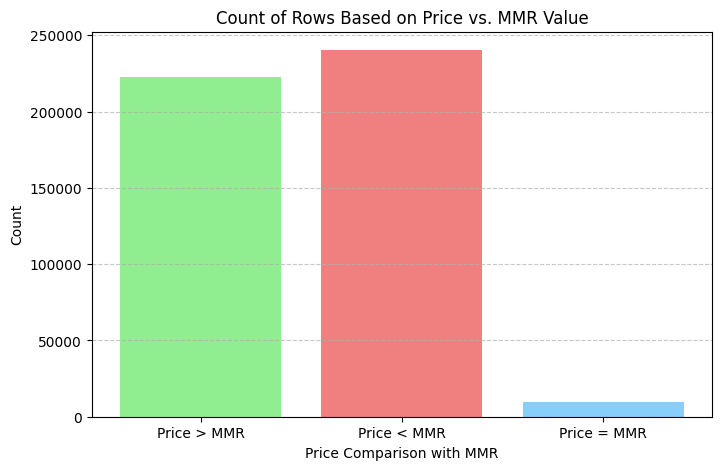

In [117]:

greater_count = len(df[df['price'] > df['MMR_value']])
less_count = len(df[df['price'] < df['MMR_value']])
equal_count = len(df[df['price'] == df['MMR_value']])

categories = ['Price > MMR', 'Price < MMR', 'Price = MMR']
counts = [greater_count, less_count, equal_count]

plt.figure(figsize=(8, 5))
plt.bar(categories, counts, color=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.xlabel('Price Comparison with MMR')
plt.ylabel('Count')
plt.title('Count of Rows Based on Price vs. MMR Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


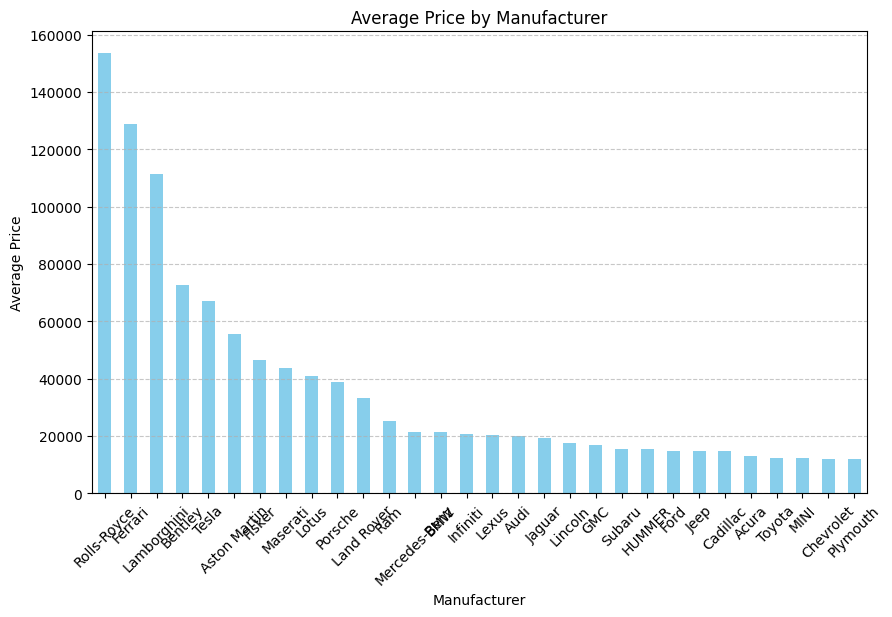

In [145]:

avg_price_by_manufacturer = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_price_by_manufacturer.head(30).plot(kind='bar', color='skyblue')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.title('Average Price by Manufacturer')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


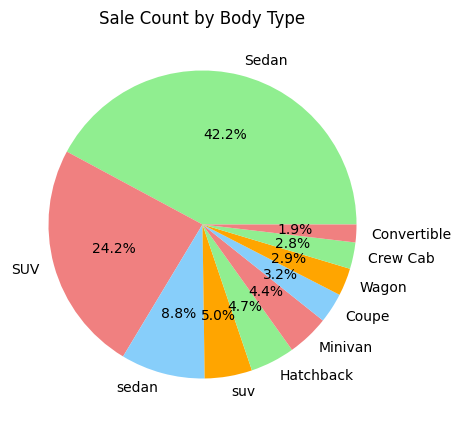

In [123]:
sale_count_by_body_type = df['body_type'].value_counts()

plt.figure(figsize=(8, 5))
sale_count_by_body_type.head(10).plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue', 'orange'])
plt.title('Sale Count by Body Type')
plt.ylabel('')
plt.show()


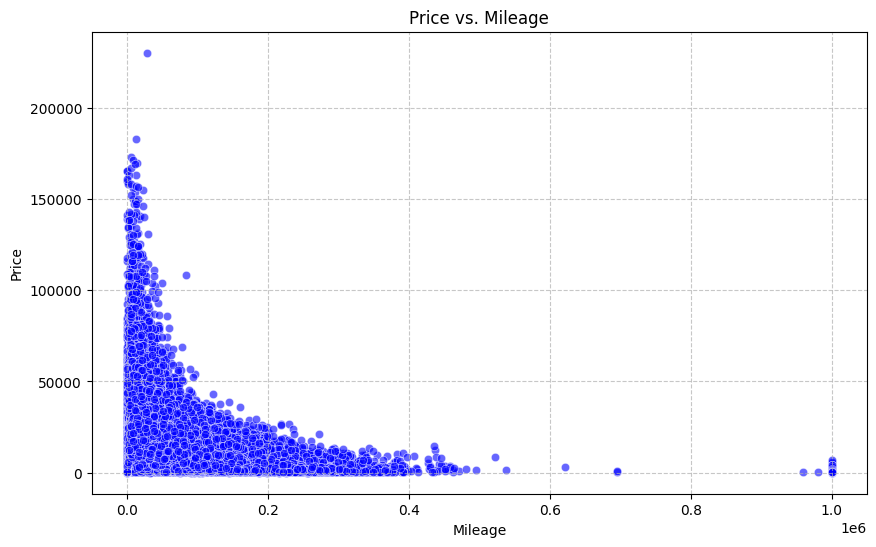

In [124]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=df, alpha=0.6, color='blue')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs. Mileage')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


/var/folders/cv/57_q_p5n4cncc53s74r1mjy80000gn/T/ipykernel_16404/2185227801.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_sales = df['sale_date'].dt.to_period('M').value_counts().sort_index()


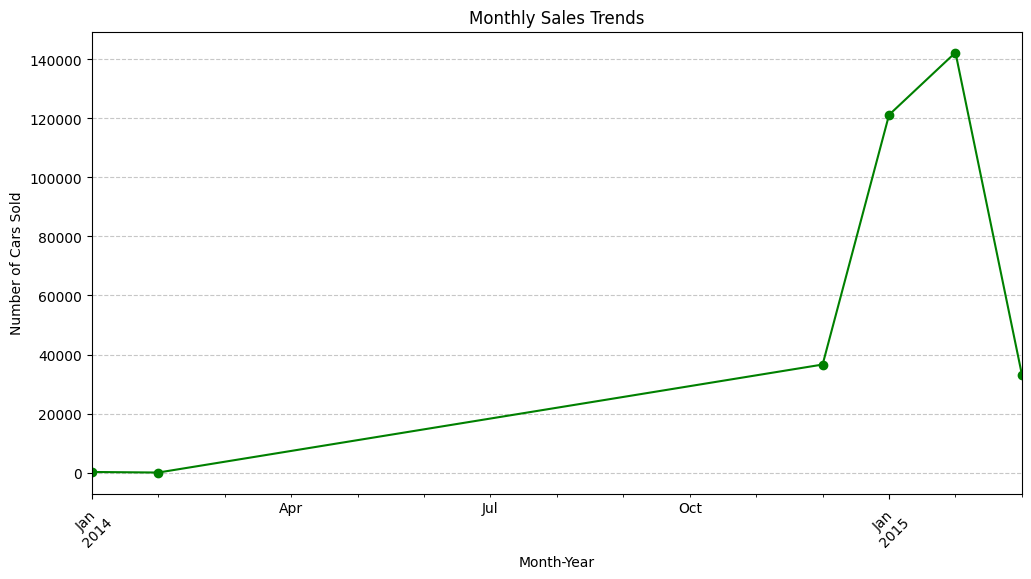

In [126]:
df['sale_date'] = pd.to_datetime(df['sale_date'], format='%Y-%m-%d', errors='coerce')

monthly_sales = df['sale_date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cars Sold')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


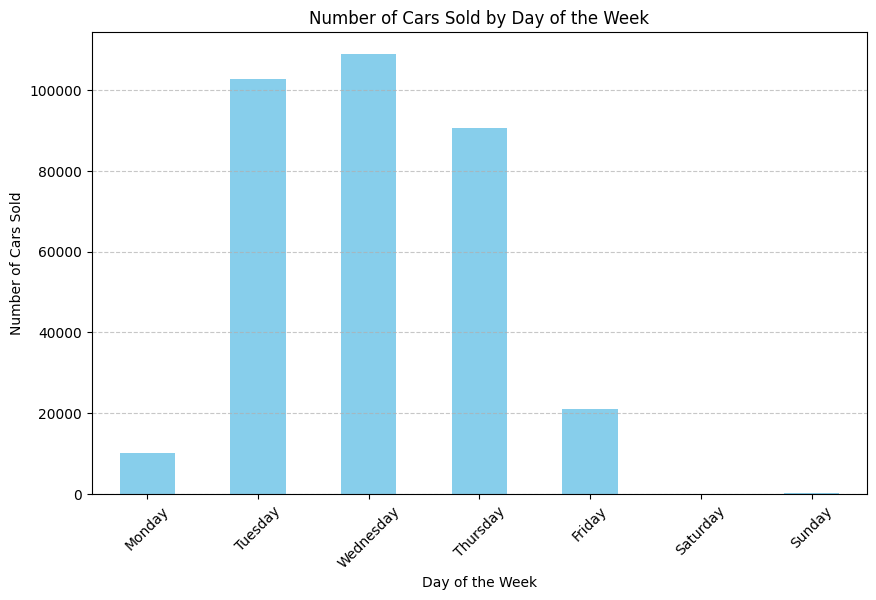

In [141]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

df['day_of_week'] = df['sale_date'].dt.day_name()

sales_by_day = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold by Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


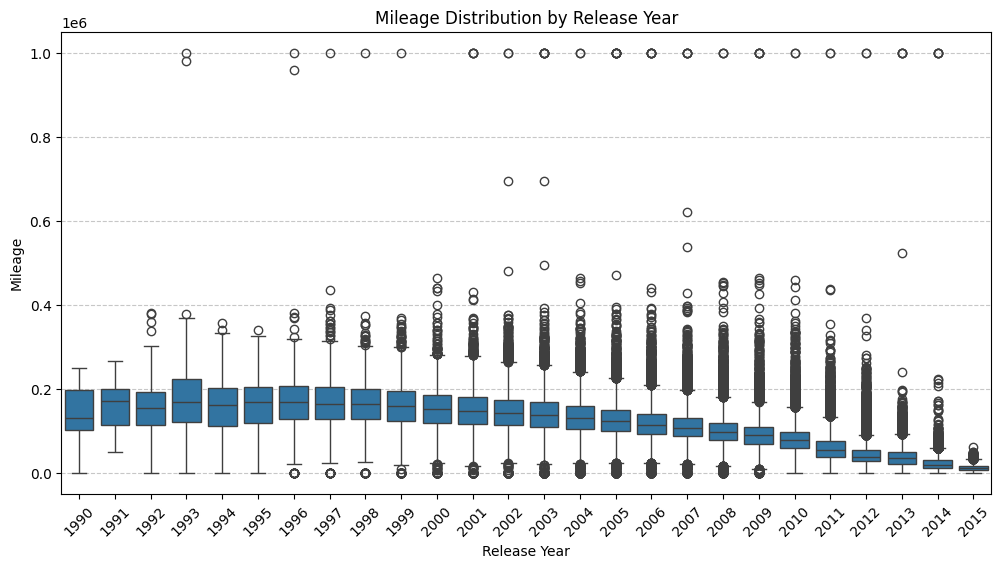

In [128]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='release_year', y='mileage', data=df)
plt.xlabel('Release Year')
plt.ylabel('Mileage')
plt.title('Mileage Distribution by Release Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


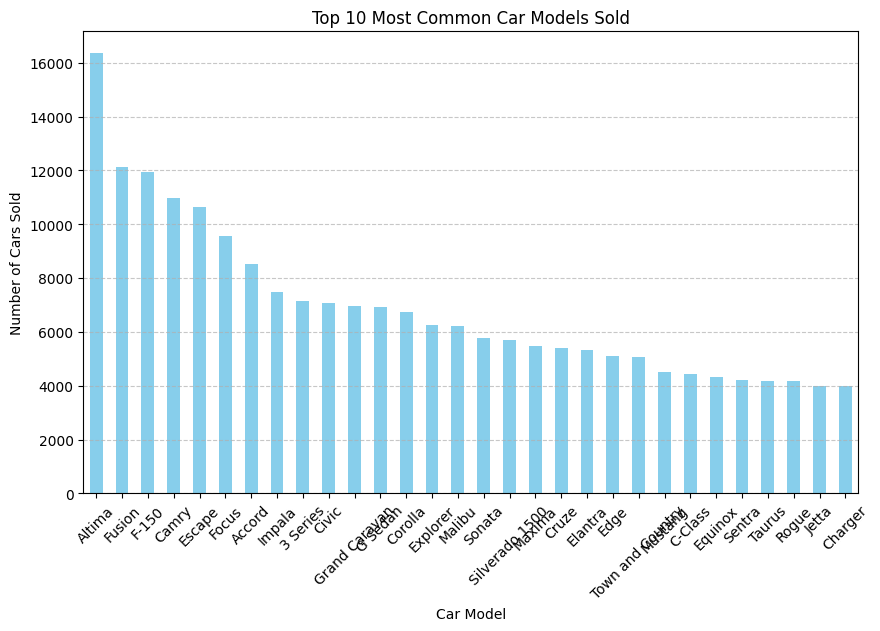

In [135]:
most_common_models = df['model'].value_counts().head(30)

plt.figure(figsize=(10, 6))
most_common_models.plot(kind='bar', color='skyblue')
plt.xlabel('Car Model')
plt.ylabel('Number of Cars Sold')
plt.title('Top 30 Most Common Car Models Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


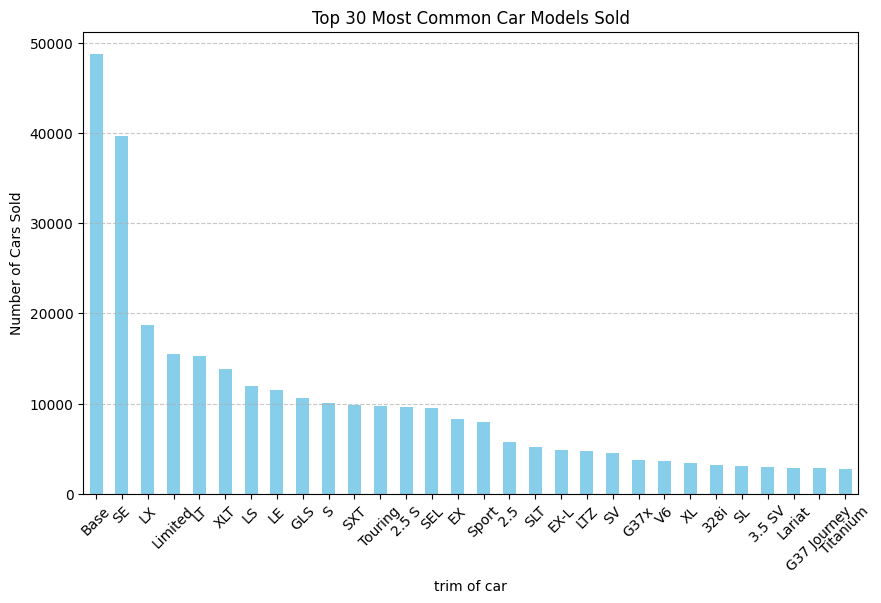

In [136]:
most_common_models = df['trim'].value_counts().head(30)

plt.figure(figsize=(10, 6))
most_common_models.plot(kind='bar', color='skyblue')
plt.xlabel('trim of car')
plt.ylabel('Number of Cars Sold')
plt.title('Top 30 Most Common Car Models Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [137]:
trims_per_model = df.groupby('model')['trim'].unique()

trims_per_model_df = trims_per_model.reset_index()
trims_per_model_df.columns = ['Model', 'Trim Levels']

print(trims_per_model_df.head(10))


                   Model                                        Trim Levels
0               1 Series                    [135i, 128i, 128i SULEV, 135is]
1                   1500  [ST, SLT, R/T, Sport, Laramie, Laramie Longhor...
2              190-Class                                         [190E 2.3]
3               2 Series                                      [228i, M235i]
4                    200                       [LX, Limited, Touring, S, C]
5                  200SX                                         [SE, Base]
6                   2500  [ST, SLT, Tradesman, Laramie, Laramie Longhorn...
7                      3  [s Grand Touring, s Sport, i, i Touring, i Gra...
8               3 Series  [328i SULEV, 335is, 328i, 335i, 328i xDrive, 3...
9  3 Series Gran Turismo      [328i xDrive, 335i xDrive, 328i xDrive SULEV]
